# 1 decision : jump or not jump

In [ ]:
import random
import matplotlib.pyplot as plt
import subprocess
import tempfile
import json

def train(run_game_function, weight_size, generations=1000, epsilon=0, epsilon_decay=1, name="No Name", nameOfTheFile="jeuClassique.py"):
    best_weights = [random.uniform(-1, 1) for _ in range(weight_size)]
    best_score = run_game_function(best_weights)

    epsilon_min = 0
    scores = []
    moving_avg = []
    epsilons = []

    for gen in range(generations):
        epsilons.append(epsilon)

        if random.random() < epsilon:
            weights = [random.uniform(-2, 2) for _ in range(weight_size)]
        else:
            weights = [w + random.uniform(-0.2, 0.2) for w in best_weights]

        score = run_game_function(weights)

        scores.append(score)
        avg = sum(scores[-100:]) / min(len(scores), 100)
        moving_avg.append(avg)

        print(f"Generation {gen} | Score: {score:.2f} | ε={epsilon:.4f}")

        if score > best_score:
            best_score = score
            best_weights = weights
            print("🎉 New best score:", best_score)

        epsilon = max(epsilon_min, epsilon * epsilon_decay)

    print("\n--- Training complete ---")
    print("Best score:", best_score)
    print("Best weights found:", best_weights)
    final_weights = best_weights

    fig, ax1 = plt.subplots()

    ax1.set_xlabel("Generations")
    ax1.set_ylabel("Score", color='tab:blue')
    ax1.plot(scores, label="Scores", color='tab:blue', alpha=0.5)
    ax1.plot(moving_avg, label="Moving average (100 generations)", color='tab:red', linestyle='dashed')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel("ε (Epsilon)", color='tab:green')
    ax2.plot(epsilons, label="Epsilon", color='tab:green', linestyle='dotted')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    fig.tight_layout()
    plt.title(name)
    fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
    plt.show()

    print("Launching a game with the best weights...")

    with tempfile.NamedTemporaryFile(mode='w', delete=False, suffix='.json') as f:
        json.dump(final_weights, f)
        temp_file_path = f.name

    subprocess.run(["python", nameOfTheFile, temp_file_path])

    print("\n--- Evaluating final weights over 100 games ---")
    final_scores = [run_game_function(final_weights) for _ in range(100)]

    avg_score = sum(final_scores) / len(final_scores)
    std_dev = (sum((x - avg_score) ** 2 for x in final_scores) / len(final_scores)) ** 0.5
    min_score = min(final_scores)
    max_score = max(final_scores)

    print("\n✅ Final Weights Evaluation (100 games):")
    print(f"- Average score: {avg_score:.2f}")
    print(f"- Standard deviation: {std_dev:.2f}")
    print(f"- Min score: {min_score}")
    print(f"- Max score: {max_score}")

    plt.figure(figsize=(10, 5))
    plt.hist(final_scores, bins=20, color='skyblue', edgecolor='black')
    plt.axvline(avg_score, color='red', linestyle='dashed', linewidth=1.5, label=f"Avg: {avg_score:.2f}")
    plt.axvline(min_score, color='gray', linestyle='dotted', linewidth=1.5, label=f"Min: {min_score}")
    plt.axvline(max_score, color='green', linestyle='dotted', linewidth=1.5, label=f"Max: {max_score}")
    plt.title(f"{name} - Final Score Distribution (100 Games)")
    plt.xlabel("Score")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.show()


## Flappy bird CLASSIQUE

In [2]:
from jeuClassique import run_game as run_game_classique

pygame 2.6.1 (SDL 2.28.4, Python 3.12.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Epsilon greedy

Generation 0 | Score: 35.00 | ε=0.1000
Generation 1 | Score: 35.00 | ε=0.1000
Generation 2 | Score: 35.00 | ε=0.1000
Generation 3 | Score: 35.00 | ε=0.1000
Generation 4 | Score: 35.00 | ε=0.1000
Generation 5 | Score: 55.00 | ε=0.1000
🎉 New best score: 55
Generation 6 | Score: 55.00 | ε=0.1000
Generation 7 | Score: 55.00 | ε=0.1000
Generation 8 | Score: 55.00 | ε=0.1000
Generation 9 | Score: 55.00 | ε=0.1000
Generation 10 | Score: 55.00 | ε=0.1000
Generation 11 | Score: 55.00 | ε=0.1000
Generation 12 | Score: 55.00 | ε=0.1000
Generation 13 | Score: 55.00 | ε=0.1000
Generation 14 | Score: 55.00 | ε=0.1000
Generation 15 | Score: 55.00 | ε=0.1000
Generation 16 | Score: 55.00 | ε=0.1000
Generation 17 | Score: 55.00 | ε=0.1000
Generation 18 | Score: 55.00 | ε=0.1000
Generation 19 | Score: 55.00 | ε=0.1000
Generation 20 | Score: 55.00 | ε=0.1000
Generation 21 | Score: 55.00 | ε=0.1000
Generation 22 | Score: 55.00 | ε=0.1000
Generation 23 | Score: 55.00 | ε=0.1000
Generation 24 | Score: 55.00 

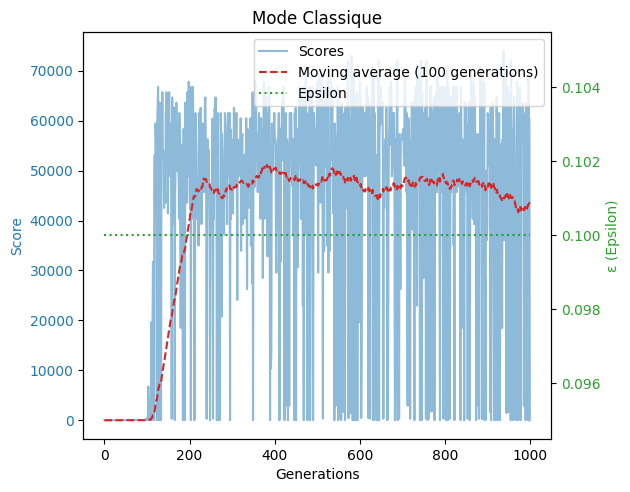

Launching a game with the best weights...
Launching a game with the best weights...

--- Evaluating final weights over 100 games ---

✅ Final Weights Evaluation (100 games):
- Average score: 62078.80
- Standard deviation: 5665.83
- Min score: 46746
- Max score: 71950


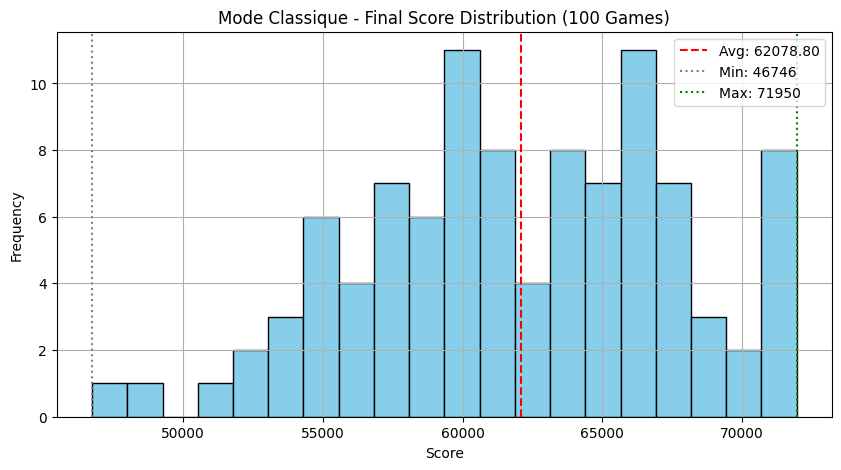

In [3]:
train(run_game_function=run_game_classique, weight_size=5, generations=1000, epsilon=0.1, epsilon_decay=1, name="Mode Classique", nameOfTheFile="jeuClassique.py")

### Epsilon greedy decaying

Generation 0 | Score: 0.43 | ε=1.0000
Generation 1 | Score: -1.74 | ε=0.9950
Generation 2 | Score: -4.56 | ε=0.9900
Generation 3 | Score: -7.11 | ε=0.9851
Generation 4 | Score: 4.71 | ε=0.9801
Generation 5 | Score: 10.89 | ε=0.9752
🎉 New best score: 10.886739747094062
Generation 6 | Score: 8.71 | ε=0.9704
Generation 7 | Score: 13.56 | ε=0.9655
🎉 New best score: 13.557254712076656
Generation 8 | Score: -5.01 | ε=0.9607
Generation 9 | Score: 4.74 | ε=0.9559
Generation 10 | Score: -2.01 | ε=0.9511
Generation 11 | Score: 5.48 | ε=0.9464
Generation 12 | Score: -2.99 | ε=0.9416
Generation 13 | Score: 1.57 | ε=0.9369
Generation 14 | Score: 5.69 | ε=0.9322
Generation 15 | Score: -6.66 | ε=0.9276
Generation 16 | Score: -5.09 | ε=0.9229
Generation 17 | Score: 2.78 | ε=0.9183
Generation 18 | Score: -1.18 | ε=0.9137
Generation 19 | Score: 2.53 | ε=0.9092
Generation 20 | Score: 12.99 | ε=0.9046
Generation 21 | Score: -2.08 | ε=0.9001
Generation 22 | Score: -0.12 | ε=0.8956
Generation 23 | Score: -4

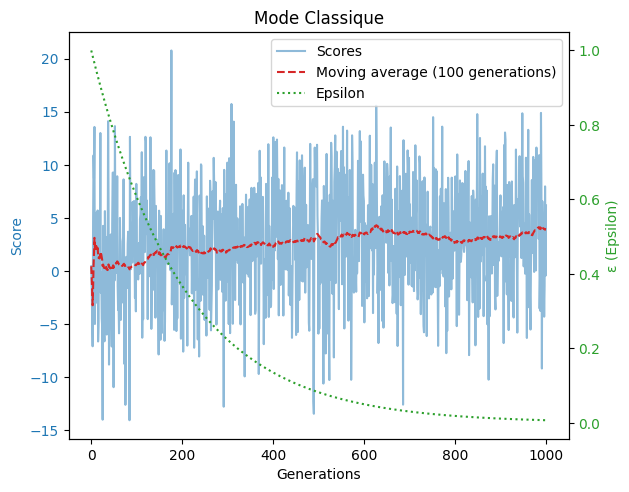

Launching a game with the best weights...


In [27]:
train(run_game_function=run_game_classique, weight_size=5, generations=1000, epsilon=1, epsilon_decay=0.995, name="Mode Classique", nameOfTheFile="jeuClassique.py")

### Gredy simple

Generation 0 | Score: 35.00 | ε=0.0000
Generation 1 | Score: 35.00 | ε=0.0000
Generation 2 | Score: 35.00 | ε=0.0000
Generation 3 | Score: 35.00 | ε=0.0000
Generation 4 | Score: 35.00 | ε=0.0000
Generation 5 | Score: 35.00 | ε=0.0000
Generation 6 | Score: 35.00 | ε=0.0000
Generation 7 | Score: 35.00 | ε=0.0000
Generation 8 | Score: 35.00 | ε=0.0000
Generation 9 | Score: 35.00 | ε=0.0000
Generation 10 | Score: 35.00 | ε=0.0000
Generation 11 | Score: 35.00 | ε=0.0000
Generation 12 | Score: 35.00 | ε=0.0000
Generation 13 | Score: 35.00 | ε=0.0000
Generation 14 | Score: 35.00 | ε=0.0000
Generation 15 | Score: 35.00 | ε=0.0000
Generation 16 | Score: 35.00 | ε=0.0000
Generation 17 | Score: 35.00 | ε=0.0000
Generation 18 | Score: 35.00 | ε=0.0000
Generation 19 | Score: 35.00 | ε=0.0000
Generation 20 | Score: 35.00 | ε=0.0000
Generation 21 | Score: 35.00 | ε=0.0000
Generation 22 | Score: 35.00 | ε=0.0000
Generation 23 | Score: 35.00 | ε=0.0000
Generation 24 | Score: 35.00 | ε=0.0000
Generation

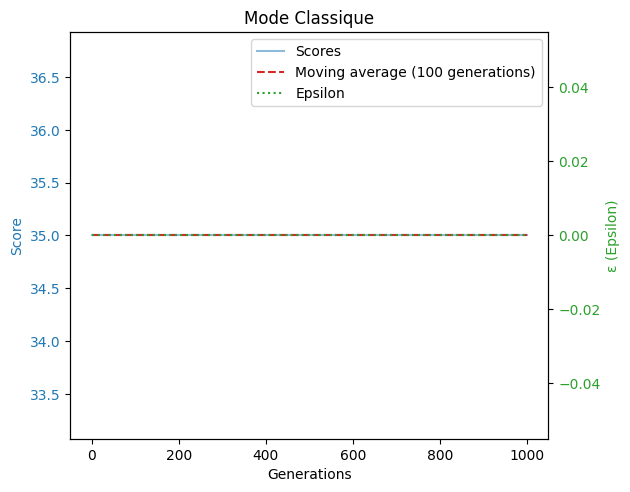

Launching a game with the best weights...


In [19]:
train(run_game_function=run_game_classique, weight_size=5, generations=1000, epsilon=0, epsilon_decay=0, name="Mode Classique", nameOfTheFile="jeuClassique.py")

# Comparison of the 3 learning methods

Running Greedy (ε=0)


Parallel runs: 100%|██████████| 10/10 [00:42<00:00,  4.20s/it]


Running Epsilon-Greedy (ε=0.1)


Parallel runs: 100%|██████████| 10/10 [01:59<00:00, 11.99s/it]


Running Decaying ε-Greedy (ε=1→0)


Parallel runs: 100%|██████████| 10/10 [02:18<00:00, 13.87s/it]


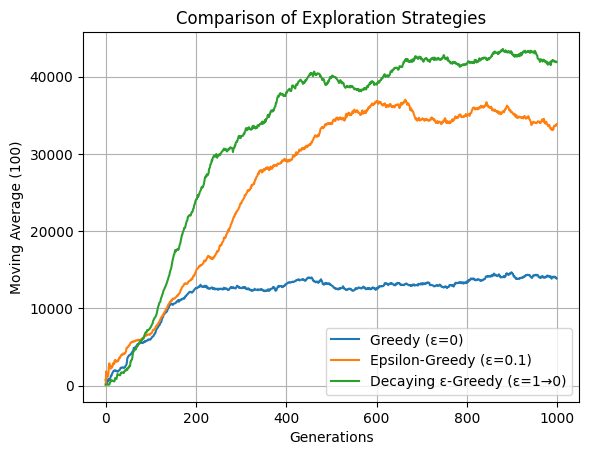

In [2]:
import random
import matplotlib.pyplot as plt
import concurrent.futures
from tqdm import tqdm


def train_single_run(run_game_function, weight_size, generations, epsilon, epsilon_decay):
    best_weights = [random.uniform(-1, 1) for _ in range(weight_size)]
    best_score = run_game_function(best_weights)

    epsilon_min = 0
    scores = []
    moving_avg = []

    for _ in range(generations):
        if random.random() < epsilon:
            weights = [random.uniform(-2, 2) for _ in range(weight_size)]
        else:
            weights = [w + random.uniform(-0.2, 0.2) for w in best_weights]

        score = run_game_function(weights)
        scores.append(score)

        avg = sum(scores[-100:]) / min(len(scores), 100)

        moving_avg.append(avg)

        if score > best_score:
            best_score = score
            best_weights = weights

        epsilon = max(epsilon_min, epsilon * epsilon_decay)

    return moving_avg

def average_runs(run_game_function, weight_size, generations, epsilon, epsilon_decay, n_runs=100):
    results = []
    with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
        futures = [
            executor.submit(train_single_run, run_game_function, weight_size, generations, epsilon, epsilon_decay)
            for _ in range(n_runs)
        ]
        for f in tqdm(concurrent.futures.as_completed(futures), total=n_runs, desc="Parallel runs"):
            results.append(f.result())

    averaged = [sum(gen_scores) / len(gen_scores) for gen_scores in zip(*results)]
    return averaged

def run_all_methods(run_game_function, weight_size=5, generations=1000):
    methods = {
        "Greedy (ε=0)": {"epsilon": 0.0, "decay": 1.0},
        "Epsilon-Greedy (ε=0.1)": {"epsilon": 0.1, "decay": 1.0},
        "Decaying ε-Greedy (ε=1→0)": {"epsilon": 1.0, "decay": 0.995},
    }

    results = {}

    for label, params in methods.items():
        print(f"Running {label}")
        avg = average_runs(
            run_game_function,
            weight_size,
            generations,
            epsilon=params["epsilon"],
            epsilon_decay=params["decay"]
        )
        results[label] = avg

    for label, moving_avg in results.items():
        plt.plot(moving_avg, label=label)

    plt.xlabel("Generations")
    plt.ylabel("Moving Average (100)")
    plt.title("Comparison of Exploration Strategies")
    plt.legend()
    plt.grid(True)
    plt.show()


run_all_methods(run_game_classique)


## Flappy Bird complex version

We add complexity to the game : some wind, moving pipes and unfazed pipes

In [5]:
from jeuComplexe import run_game_complexe

### Epsilon greedy decaying

Generation 0 | Score: 32.00 | ε=1.0000
Generation 1 | Score: 41.00 | ε=0.9950
Generation 2 | Score: 32.00 | ε=0.9900
Generation 3 | Score: 31746.00 | ε=0.9851
🎉 New best score: 31746
Generation 4 | Score: 41.00 | ε=0.9801
Generation 5 | Score: 252.00 | ε=0.9752
Generation 6 | Score: 41.00 | ε=0.9704
Generation 7 | Score: 246.00 | ε=0.9655
Generation 8 | Score: 33.00 | ε=0.9607
Generation 9 | Score: 146.00 | ε=0.9559
Generation 10 | Score: 41.00 | ε=0.9511
Generation 11 | Score: 164.00 | ε=0.9464
Generation 12 | Score: 41.00 | ε=0.9416
Generation 13 | Score: 32.00 | ε=0.9369
Generation 14 | Score: 31.00 | ε=0.9322
Generation 15 | Score: 41.00 | ε=0.9276
Generation 16 | Score: 32.00 | ε=0.9229
Generation 17 | Score: 34993.00 | ε=0.9183
🎉 New best score: 34993
Generation 18 | Score: 41.00 | ε=0.9137
Generation 19 | Score: 41.00 | ε=0.9092
Generation 20 | Score: 32.00 | ε=0.9046
Generation 21 | Score: 32.00 | ε=0.9001
Generation 22 | Score: 41.00 | ε=0.8956
Generation 23 | Score: 41.00 | ε

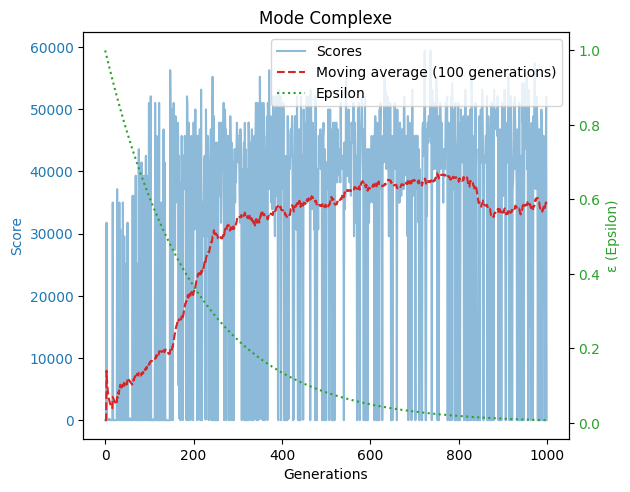

Launching a game with the best weights...
Launching a game with the best weights...

--- Evaluating final weights over 100 games ---

✅ Final Weights Evaluation (100 games):
- Average score: 48500.94
- Standard deviation: 3851.97
- Min score: 40328
- Max score: 56264


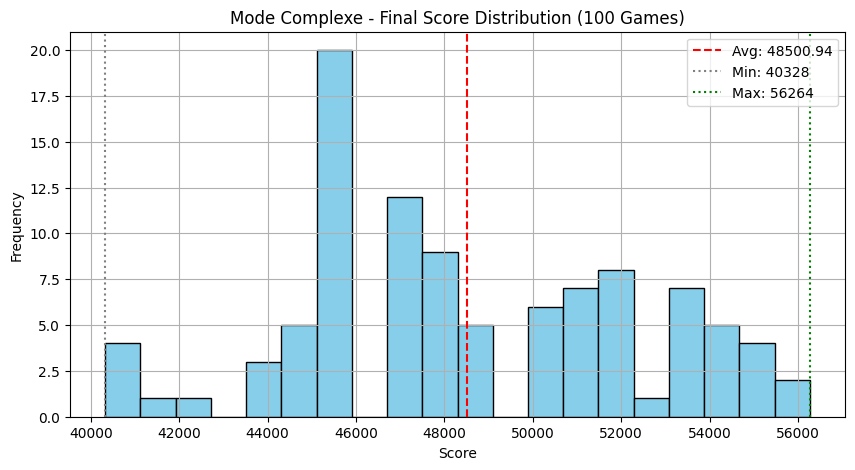

In [7]:
train(run_game_function=run_game_complexe, weight_size=8, generations=1000, epsilon=1, epsilon_decay=0.995, name="Mode Complexe", nameOfTheFile="jeuComplexe.py")

This is easily getting the perfect score, we need to raise the difficulty!

# Flappy bird with bonus points

In [3]:
from jeuClassiqueBonus import run_game_classique_bonus
from jeuClassiqueBonusSecondDegre import run_game_classique_bonus as run_game_classique_bonus_second_degre

Generation 0 | Score: 31.00 | ε=1.0000
Generation 1 | Score: 329.00 | ε=0.9999
🎉 New best score: 329
Generation 2 | Score: 5668.00 | ε=0.9998
🎉 New best score: 5668
Generation 3 | Score: 335.00 | ε=0.9997
Generation 4 | Score: 328.00 | ε=0.9996
Generation 5 | Score: 32.00 | ε=0.9995
Generation 6 | Score: 32.00 | ε=0.9994
Generation 7 | Score: 32.00 | ε=0.9993
Generation 8 | Score: 329.00 | ε=0.9992
Generation 9 | Score: 32.00 | ε=0.9991
Generation 10 | Score: 41.00 | ε=0.9990
Generation 11 | Score: 32.00 | ε=0.9989
Generation 12 | Score: 33.00 | ε=0.9988
Generation 13 | Score: 31.00 | ε=0.9987
Generation 14 | Score: 327.00 | ε=0.9986
Generation 15 | Score: 32.00 | ε=0.9985
Generation 16 | Score: 33.00 | ε=0.9984
Generation 17 | Score: 32.00 | ε=0.9983
Generation 18 | Score: 41.00 | ε=0.9982
Generation 19 | Score: 41.00 | ε=0.9981
Generation 20 | Score: 31.00 | ε=0.9980
Generation 21 | Score: 41.00 | ε=0.9979
Generation 22 | Score: 41.00 | ε=0.9978
Generation 23 | Score: 41.00 | ε=0.997

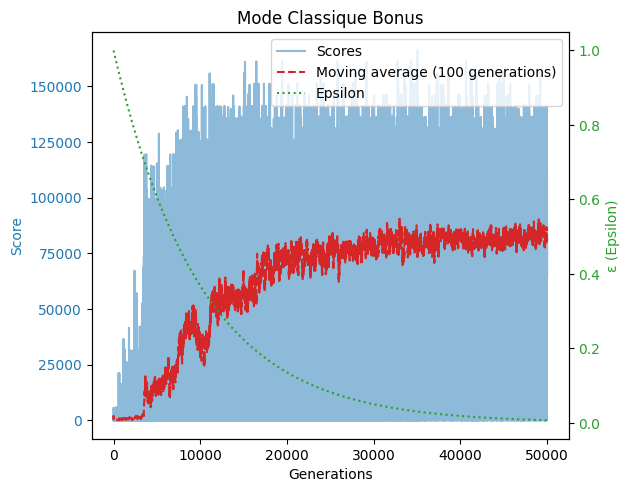

Launching a game with the best weights...


In [7]:
train(run_game_function=run_game_classique_bonus, weight_size=7, generations=50000, epsilon=1, epsilon_decay=0.9999, name="Mode Classique Bonus", nameOfTheFile="jeuClassiqueBonus.py")

Génération 0 | Score: 31.00 | ε=1.0000
Génération 1 | Score: 32.00 | ε=0.9995
Génération 2 | Score: 386.00 | ε=0.9990
Génération 3 | Score: 33.00 | ε=0.9985
Génération 4 | Score: 32.00 | ε=0.9980
Génération 5 | Score: 41.00 | ε=0.9975
Génération 6 | Score: 333.00 | ε=0.9970
Génération 7 | Score: 41.00 | ε=0.9965
Génération 8 | Score: 31.00 | ε=0.9960
Génération 9 | Score: 6633.00 | ε=0.9955
🎉 Nouveau meilleur score: 6633
Génération 10 | Score: 334.00 | ε=0.9950
Génération 11 | Score: 334.00 | ε=0.9945
Génération 12 | Score: 41.00 | ε=0.9940
Génération 13 | Score: 6628.00 | ε=0.9935
Génération 14 | Score: 31.00 | ε=0.9930
Génération 15 | Score: 338.00 | ε=0.9925
Génération 16 | Score: 330.00 | ε=0.9920
Génération 17 | Score: 41.00 | ε=0.9915
Génération 18 | Score: 41.00 | ε=0.9910
Génération 19 | Score: 281.00 | ε=0.9905
Génération 20 | Score: 31.00 | ε=0.9900
Génération 21 | Score: 41.00 | ε=0.9896
Génération 22 | Score: 41.00 | ε=0.9891
Génération 23 | Score: 31.00 | ε=0.9886
Générati

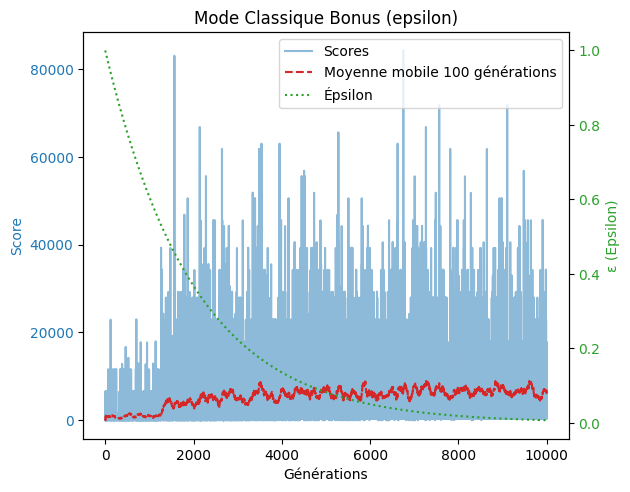

Lancement d'une partie avec les meilleurs coefficients ...


In [12]:
train(run_game_function=run_game_classique_bonus_second_degre, weight_size=7, generations=10000, epsilon=1, epsilon_decay=0.9995, name="Mode Classique Bonus", nameOfTheFile="jeuClassiqueBonusSecondDegre.py")

# Flappy bird with 2 decisions : jumps and ability

In [8]:
import random
import matplotlib.pyplot as plt
import json
import tempfile
import subprocess

def train_2_decisions(run_game_function, weight_size, generations=1000, epsilon=0, epsilon_decay=1, name="No Name", nameOfTheFile="jeuPowerUP.py"):
    weight_size_jump, weight_size_invincibility = weight_size 
    best_weights_jump = [random.uniform(-1, 1) for _ in range(weight_size_jump)]
    best_weights_powerUP = [random.uniform(-1, 1) for _ in range(weight_size_invincibility)]
    best_score = run_game_function(best_weights_jump, best_weights_powerUP)

    epsilon_min = 0
    scores = []
    moving_avg = []
    epsilons = []

    for gen in range(generations):
        epsilons.append(epsilon)

        if random.random() < epsilon:
            weights_jump = [random.uniform(-2, 2) for _ in range(weight_size_jump)]
            weights_powerUP = [random.uniform(-2, 2) for _ in range(weight_size_invincibility)]
        else:
            weights_jump = [w + random.uniform(-0.2, 0.2) for w in best_weights_jump]
            weights_powerUP = [w + random.uniform(-0.2, 0.2) for w in best_weights_powerUP]
        
        score = run_game_function(weights_jump, weights_powerUP)

        scores.append(score)
        avg = sum(scores[-100:]) / min(len(scores), 100)
        moving_avg.append(avg)

        print(f"Génération {gen} | Score: {score:.2f} | ε={epsilon:.4f}")

        if score > best_score:
            best_score = score
            best_weights_jump = weights_jump
            best_weights_powerUP = weights_powerUP

            print("🎉 Nouveau meilleur score:", best_score)

        epsilon = max(epsilon_min, epsilon * epsilon_decay)

    print("\n--- Entraînement terminé ---")
    print("Meilleur score:", best_score)
    print("Poids saut :", best_weights_jump)
    print("Poids power up :", best_weights_powerUP)

    final_weights = (best_weights_jump, best_weights_powerUP)

    # Tracé
    fig, ax1 = plt.subplots()

    ax1.set_xlabel("Générations")
    ax1.set_ylabel("Score")
    ax1.plot(scores, label="Scores", color='blue')
    ax1.plot(moving_avg, label="Moyenne mobile 100 générations", color='red', linestyle='dashed')
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx()
    ax2.set_ylabel("ε (epsilon)")
    ax2.plot(epsilons, label="Epsilon", color='green', linestyle='dotted')
    ax2.tick_params(axis='y')

    fig.suptitle(name)
    fig.legend(loc='upper left')
    plt.show()
    print("Lancement d'une partie avec les meilleurs coefficients ...")

    with tempfile.NamedTemporaryFile(mode='w', delete=False, suffix='.json') as f:
        json.dump(final_weights, f)
        temp_file_path = f.name

    subprocess.run(["python", nameOfTheFile, temp_file_path])


    print("\n--- Évaluation finale des meilleurs poids sur 100 parties ---")
    final_scores = [run_game_function(best_weights_jump, best_weights_powerUP) for _ in range(100)]

    avg_score = sum(final_scores) / len(final_scores)
    std_dev = (sum((x - avg_score) ** 2 for x in final_scores) / len(final_scores)) ** 0.5
    min_score = min(final_scores)
    max_score = max(final_scores)

    print("\n✅ Résultats de l’évaluation finale (100 parties) :")
    print(f"- Score moyen : {avg_score:.2f}")
    print(f"- Écart-type : {std_dev:.2f}")
    print(f"- Score minimum : {min_score}")
    print(f"- Score maximum : {max_score}")

    # Histogramme de la distribution des scores
    plt.figure(figsize=(10, 5))
    plt.hist(final_scores, bins=20, color='skyblue', edgecolor='black')
    plt.axvline(avg_score, color='red', linestyle='dashed', linewidth=1.5, label=f"Moyenne: {avg_score:.2f}")
    plt.axvline(min_score, color='gray', linestyle='dotted', linewidth=1.5, label=f"Min: {min_score}")
    plt.axvline(max_score, color='green', linestyle='dotted', linewidth=1.5, label=f"Max: {max_score}")
    plt.title(f"{name} - Distribution des scores finaux (100 parties)")
    plt.xlabel("Score")
    plt.ylabel("Fréquence")
    plt.legend()
    plt.grid(True)
    plt.show()

In [9]:
from jeuPowerUP import run_game_powerUP

Génération 0 | Score: 31.00 | ε=1.0000
Génération 1 | Score: 41.00 | ε=0.9995
Génération 2 | Score: 32.00 | ε=0.9990
Génération 3 | Score: 32.00 | ε=0.9985
Génération 4 | Score: 33.00 | ε=0.9980
Génération 5 | Score: 32.00 | ε=0.9975
Génération 6 | Score: 32.00 | ε=0.9970
Génération 7 | Score: 41.00 | ε=0.9965
Génération 8 | Score: 41.00 | ε=0.9960
Génération 9 | Score: 31.00 | ε=0.9955
Génération 10 | Score: 334.00 | ε=0.9950
🎉 Nouveau meilleur score: 334
Génération 11 | Score: 33.00 | ε=0.9945
Génération 12 | Score: 32.00 | ε=0.9940
Génération 13 | Score: 327.00 | ε=0.9935
Génération 14 | Score: 32.00 | ε=0.9930
Génération 15 | Score: 31.00 | ε=0.9925
Génération 16 | Score: 30.00 | ε=0.9920
Génération 17 | Score: 41.00 | ε=0.9915
Génération 18 | Score: 41.00 | ε=0.9910
Génération 19 | Score: 41.00 | ε=0.9905
Génération 20 | Score: 41.00 | ε=0.9900
Génération 21 | Score: 41.00 | ε=0.9896
Génération 22 | Score: 328.00 | ε=0.9891
Génération 23 | Score: 49.00 | ε=0.9886
Génération 24 | S

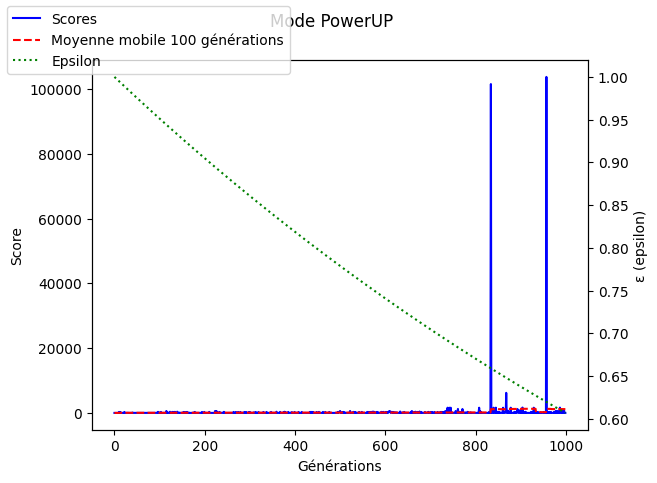

Lancement d'une partie avec les meilleurs coefficients ...

--- Évaluation finale des meilleurs poids sur 100 parties ---

✅ Résultats de l’évaluation finale (100 parties) :
- Score moyen : 3365.42
- Écart-type : 17385.49
- Score minimum : 30
- Score maximum : 102635


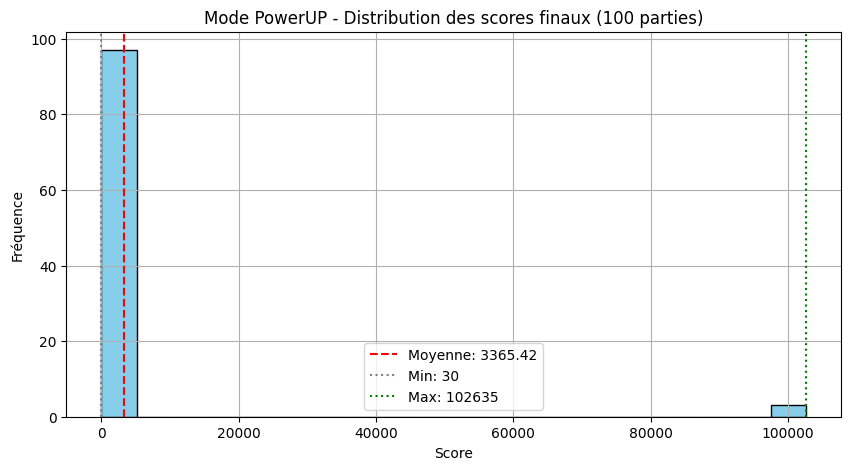

In [ ]:
train_2_decisions(run_game_function=run_game_powerUP, weight_size=(7, 7), generations=10000, epsilon=1, epsilon_decay=0.9995, name="Mode PowerUP", nameOfTheFile="jeuPowerUP.py")

# Smart batches

In [ ]:
import random
import matplotlib.pyplot as plt
import json
import tempfile
import subprocess

def train_2_decisions_batches(run_game_function, weight_size, generations=1000, epsilon=0, epsilon_decay=1, name="No Name", nameOfTheFile="jeuPowerUP.py", batch_size=10):

    best_weights = [random.uniform(-1, 1) for _ in range(weight_size)]

    best_score = float('-inf')  # la meilleure moyenne des 5 pires

    epsilon_min = 0
    scores = []        # moyennes des 5 pires du batch
    moving_avg = []    # moyennes mobiles
    epsilons = []

    for gen in range(generations):
        epsilons.append(epsilon)

        if random.random() < epsilon:
            weights = [random.uniform(-2, 2) for _ in range(weight_size)]
        else:
            weights = [w + random.uniform(-0.2, 0.2) for w in best_weights]


        batch_scores = [run_game_function(weights) for _ in range(batch_size)]

        sorted_scores = sorted(batch_scores)
        avg_worst_5 = sum(sorted_scores[:5]) / 5

        scores.append(avg_worst_5)
        moving_avg.append(sum(scores[-100:]) / min(len(scores), 100))

        print(f"Génération {gen} | Moyenne des 5 pires: {avg_worst_5:.2f} | ε={epsilon:.4f}")

        if avg_worst_5 > best_score:
            best_score = avg_worst_5
            best_weights = weights
            print("🎉 Nouveau meilleur batch basé sur la moyenne des 5 pires:", best_score)

        epsilon = max(epsilon_min, epsilon * epsilon_decay)


    print("\n--- Entraînement terminé ---")
    print("Meilleur score (moyenne des 5 pires):", best_score)
    print("Poids saut :", best_weights)
    print("Poids power up :", best_weights)

    final_weights = best_weights

    fig, ax1 = plt.subplots()

    ax1.set_xlabel("Générations")
    ax1.set_ylabel("Moyenne des 5 pires")
    ax1.plot(scores, label="Moyenne des 5 pires", color='blue')
    ax1.plot(moving_avg, label="Moyenne mobile", color='red', linestyle='dashed')
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx()
    ax2.set_ylabel("ε (epsilon)")
    ax2.plot(epsilons, label="Epsilon", color='green', linestyle='dotted')
    ax2.tick_params(axis='y')

    fig.suptitle(name)
    fig.legend(loc='upper left')
    plt.show()

    print("Lancement d'une partie avec les meilleurs coefficients ...")

    with tempfile.NamedTemporaryFile(mode='w', delete=False, suffix='.json') as f:
        json.dump(final_weights, f)
        temp_file_path = f.name

    subprocess.run(["python", nameOfTheFile, temp_file_path])

    print("\n--- Evaluating final weights over 100 games ---")
    final_scores = [run_game_function(final_weights) for _ in range(100)]

    avg_score = sum(final_scores) / len(final_scores)
    std_dev = (sum((x - avg_score) ** 2 for x in final_scores) / len(final_scores)) ** 0.5
    min_score = min(final_scores)
    max_score = max(final_scores)

    print("\n✅ Final Weights Evaluation (100 games):")
    print(f"- Average score: {avg_score:.2f}")
    print(f"- Standard deviation: {std_dev:.2f}")
    print(f"- Min score: {min_score}")
    print(f"- Max score: {max_score}")

    plt.figure(figsize=(10, 5))
    plt.hist(final_scores, bins=20, color='skyblue', edgecolor='black')
    plt.axvline(avg_score, color='red', linestyle='dashed', linewidth=1.5, label=f"Avg: {avg_score:.2f}")
    plt.axvline(min_score, color='gray', linestyle='dotted', linewidth=1.5, label=f"Min: {min_score}")
    plt.axvline(max_score, color='green', linestyle='dotted', linewidth=1.5, label=f"Max: {max_score}")
    plt.title(f"{name} - Final Score Distribution (100 Games)")
    plt.xlabel("Score")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
train_2_decisions_batches(run_game_function=run_game_classique_bonus, weight_size=7 , generations=4000, epsilon=1, epsilon_decay=0.9999, name="Mode Bonus", nameOfTheFile="jeuClassiqueBonus.py")

NameError: name 'run_game_powerUP' is not defined